# Line detection for 1 image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

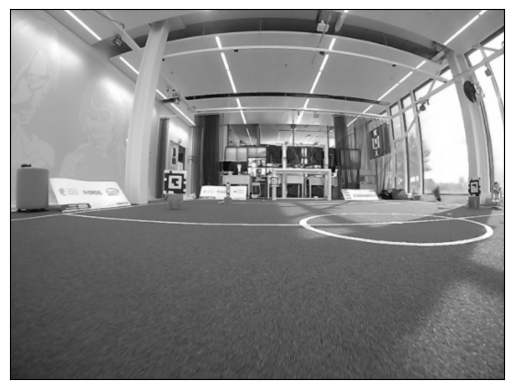

In [2]:
# Selecting an image to work with
display = cv2.imread("images/field.png")
image = cv2.cvtColor(display, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

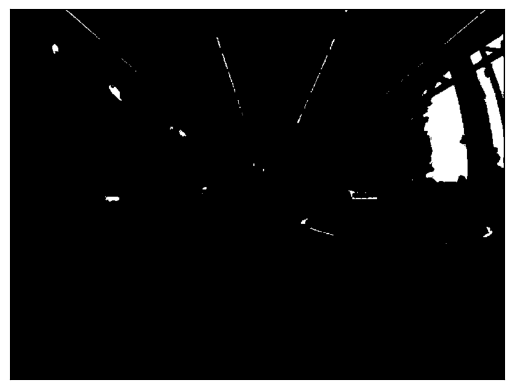

In [3]:
# Binarize
_, binary = cv2.threshold(image, 250, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

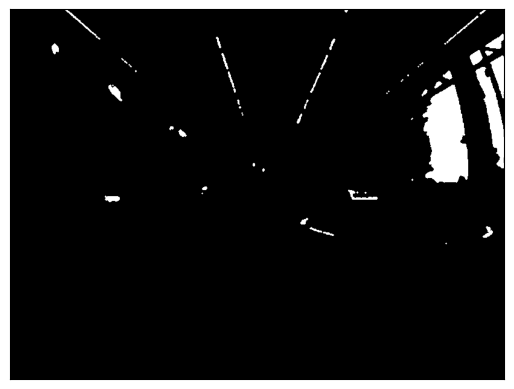

In [4]:
# Dilatation
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
binary = cv2.dilate(binary, kernel, iterations=1)
plt.imshow(binary, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

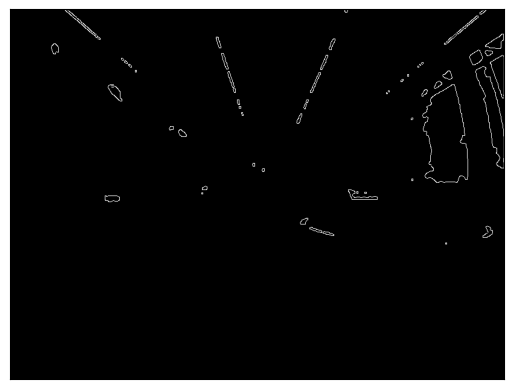

In [5]:
# Canny Edge Detection
canny = cv2.Canny(binary, 0, 255) # input is binary so thresholds are irrelevant
plt.imshow(canny, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

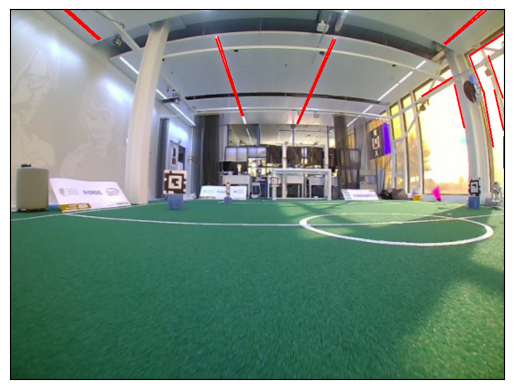

In [6]:
# Hough Transform
lines = cv2.HoughLinesP(canny, 1, np.pi/180, 30, minLineLength=50, maxLineGap=15)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(display, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(display, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

# Rinse & Repeat for more images

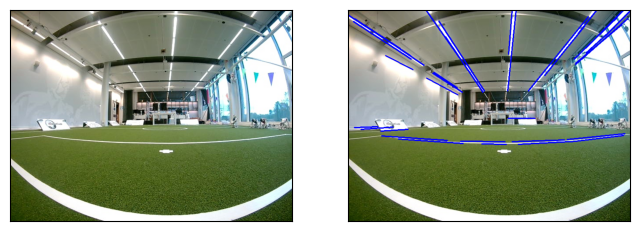

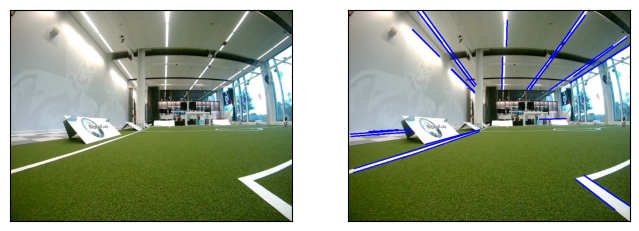

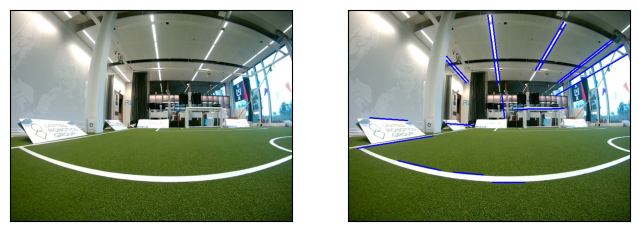

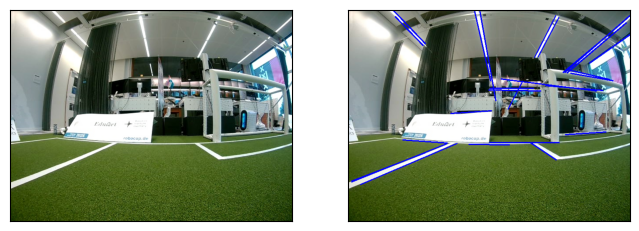

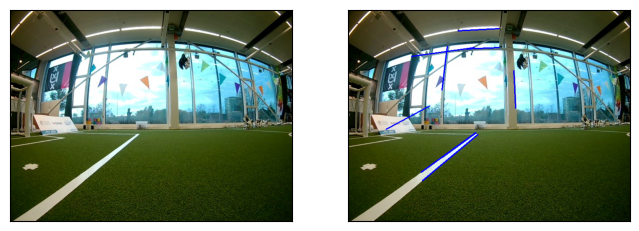

In [9]:
canny_images: list = []
for i in range(5):
    original = cv2.imread(f"images/frame000{i}.jpg")
    image = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    _, image = cv2.threshold(image, 240, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    image = cv2.dilate(image, kernel, iterations=2)
    image = cv2.Canny(image, 0, 255)
    lines = cv2.HoughLinesP(image, 1, np.pi/180, 70, minLineLength=50, maxLineGap=20)
    display = original.copy()
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(display, (x1, y1), (x2, y2), (255, 0, 0), 2)
    canny_images.append(cv2.cvtColor(display, cv2.COLOR_BGR2RGB))
    fig, ax = plt.subplots(1, 2, figsize=(8, 10))
    ax[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].imshow(cv2.cvtColor(display, cv2.COLOR_BGR2RGB))
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()

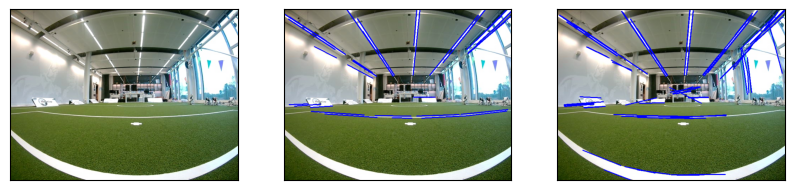

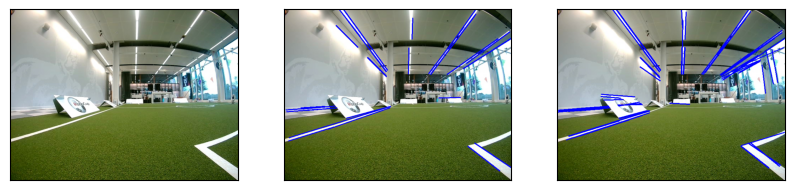

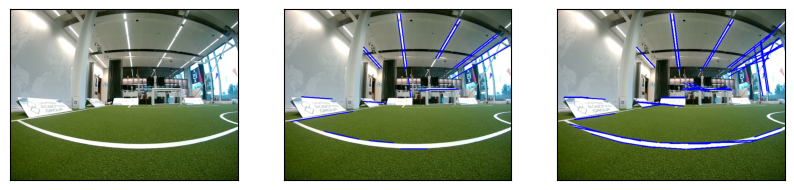

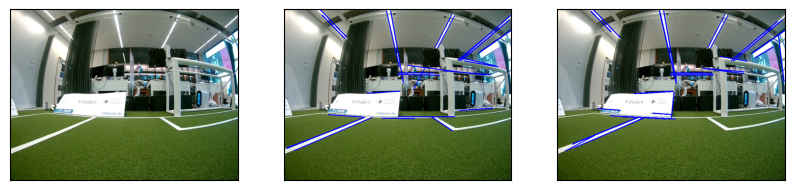

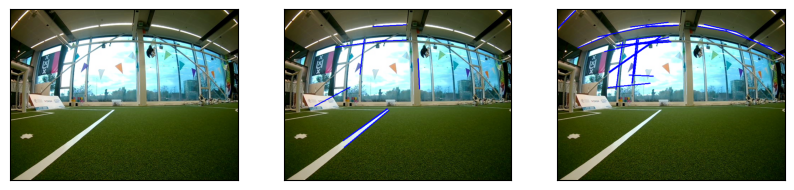

In [14]:
# REPLACING CANNY WITH LAPLACIAN
for i in range(5):
    original = cv2.imread(f"images/frame000{i}.jpg")
    image = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    _, image = cv2.threshold(image, 251, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    image = cv2.dilate(image, kernel, iterations=2)
    image = cv2.Laplacian(image, cv2.CV_64F)
    image = cv2.convertScaleAbs(image)
    lines = cv2.HoughLinesP(image, 1, np.pi/180, 70, minLineLength=50, maxLineGap=20)
    display = original.copy()
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(display, (x1, y1), (x2, y2), (255, 0, 0), 2)
    fig, ax = plt.subplots(1, 3, figsize=(10,20))
    ax[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].imshow(canny_images[i])
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[2].imshow(cv2.cvtColor(display, cv2.COLOR_BGR2RGB))
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    plt.show()